# Time Series: Forecasting Bitcoin price

In [1]:
# Importing TF and checking the version
import tensorflow as tf

print(tf.__version__)

2.10.1


### Importing time series with Pandas

In [2]:
# Reading Bitcoin data and parsing dates
import pandas as pd

df = pd.read_csv(
    "BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
    parse_dates=["Date"],
    index_col=["Date"]   
)
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
len(df)

2787

In [6]:
# Separating closing prices for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


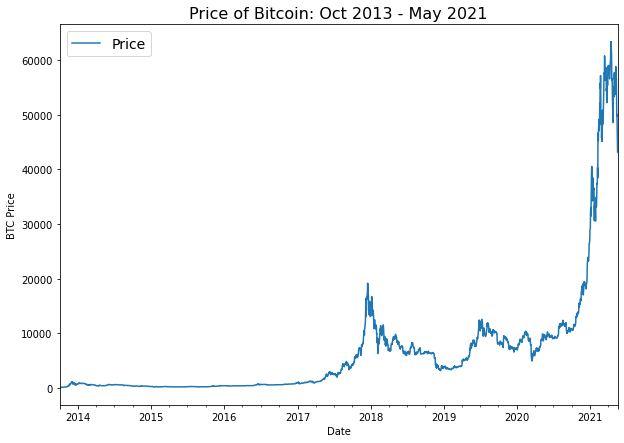

In [7]:
# Visualising Bitcoin prices
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin: Oct 2013 - May 2021", fontsize=16)
plt.legend(fontsize=14);

### Importing time series with Python

In [8]:
# Importing Bitcoin data with Python
import csv
from datetime import datetime

timestamps = []
btc_price = []
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    next(csv_reader) # Skips first line to remove column names
    for line in csv_reader:
        timestamps.append(datetime.strptime(line[1], "%Y-%m-%d"))
        btc_price.append(float(line[2]))

# Viewing first 10 records
timestamps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 1.0, 'Price of Bitcoin: Oct 2013 - May 2021')

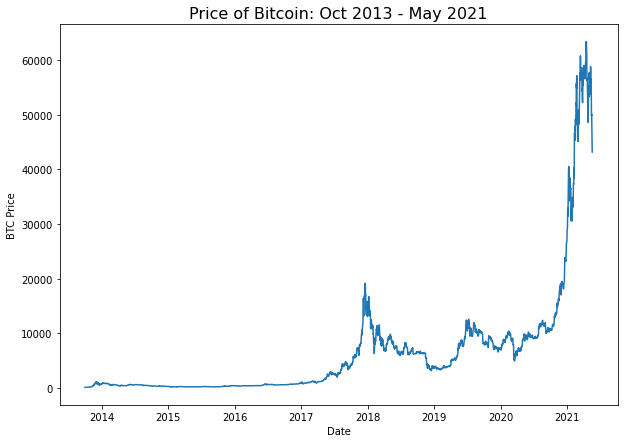

In [9]:
# Plotting from CSV
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 7))
plt.plot(timestamps, btc_price)
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin: Oct 2013 - May 2021", fontsize=16)
#plt.legend();

### Creating train and test data

In [10]:
# Get Bitcoin date array
timestamps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timestamps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
# Wrong way to create train / test split for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    timestamps, # dates
    prices, # BTC prices
    test_size=0.2,
    random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

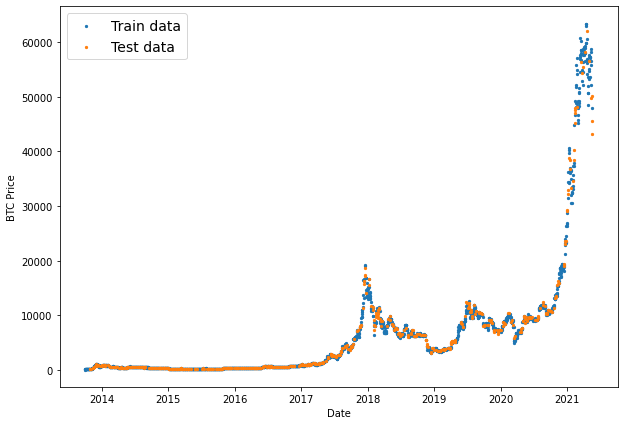

In [12]:
# Plotting the wrong data split results
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [13]:
# Right way to create train / test split for time series data
split_size = int(0.8 * len(prices)) # 80% - train, 20% - test

X_train, y_train = timestamps[:split_size], prices[:split_size]
X_test, y_test = timestamps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

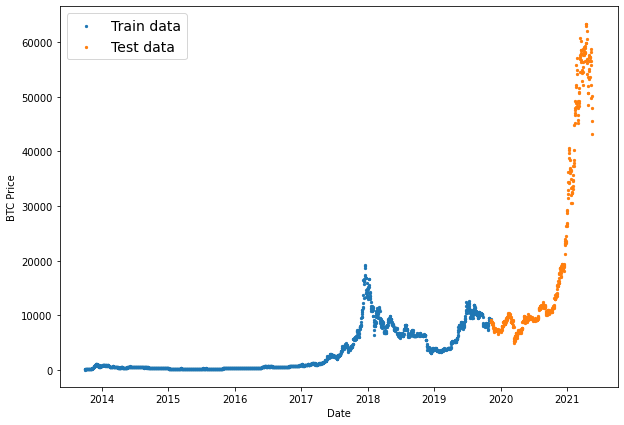

In [14]:
# Plotting the right data split results
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [15]:
# Creating plotting function
def plot_time_series(timestamps, values, marker=",", start=0, end=None, label=None):
    plt.plot(timestamps[start:end], values[start:end], marker=marker, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

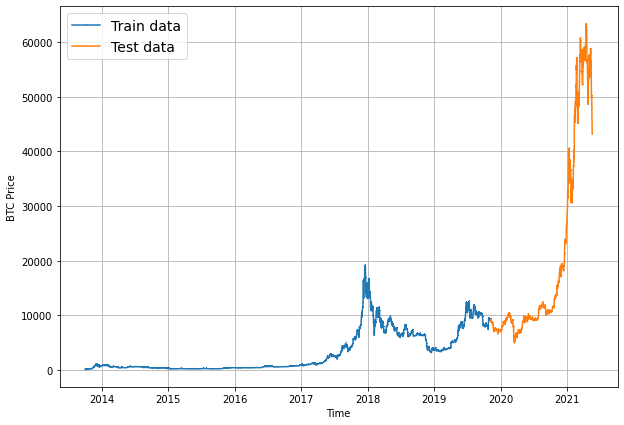

In [16]:
# Testing plot function
plt.figure(figsize=(10, 7))
plot_time_series(timestamps=X_train, values=y_train, label="Train data")
plot_time_series(timestamps=X_test, values=y_test, label="Test data")

### Model 0 - Naive forecast (baseline)

The prediction at timestamp t(y-hat) is equal to the value at timestamp t-1 (previous timestamp), i.e horizon of 1.
$$\hat{y}_{t} = y_{t-1}$$

In [17]:
# Creating naive forecast
naive_forecast = y_test[:-1]

print(f"First 10 values: {naive_forecast[:10]}\n")
print(f"Last 10 values: {naive_forecast[-10:]}")

First 10 values: [9226.48582088 8794.35864452 8798.04205463 9081.18687849 8711.53433917
 8760.89271814 8749.52059102 8656.97092235 8500.64355816 8469.2608989 ]

Last 10 values: [57107.12067189 58788.20967893 58102.19142623 55715.54665129
 56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361]


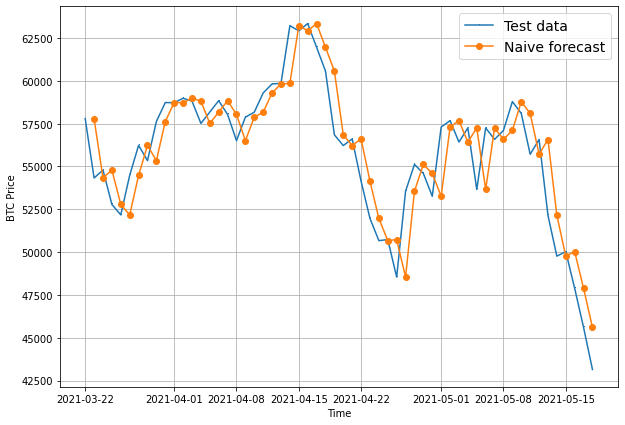

In [18]:
# Plotting naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timestamps=X_train, values=y_train, label="Train data")
plot_time_series(timestamps=X_test, values=y_test, start=500, label="Test data")
plot_time_series(timestamps=X_test[1:], values=naive_forecast, start=500, marker="o", label="Naive forecast")

In [19]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # Find MAE of Naive Forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # Seasonality of 1 day

    return mae / mae_naive_no_season

In [20]:
# Verify if MASE of Naive Forecast is 1
mean_absolute_scaled_error(
    y_true=y_test[1:],
    y_pred=naive_forecast
)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9995699939182626>

In [21]:
# Function for evaluation matrix
def evaluate_preds(y_true, y_pred):

    # Ensuring that we use float32 dtype (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculating various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
    }

In [22]:
# Evaluating naive forecast results
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

### Windowing data

In [23]:
# We want to use Bitcoin prices of the week to predict next day price
print(f"Intention is to use {btc_price[:7]} to predict {btc_price[7]}")

Intention is to use [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict 123.033


In [24]:
# Setting up global variables for window size and horizon
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data

In [25]:
# Creating function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
    return x[:, :-horizon], x[:, -horizon:]

In [26]:
# Testing window labelling function
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8) + 1, axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]])>)

In [27]:
# Creating function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):

    # 1. Creating window of specific window size
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)

    # 2. Creating 2D array of multiple windows
    window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T
    # print(f"Windows indexes: {window_indexes} with shape of {window_indexes.shape}")

    # 3. Index on the target array (time series) with 2D of multiple window steps
    windowed_array = x[window_indexes]

    # 4. Get the labelled windows
    windows, labels = get_labelled_window(windowed_array, horizon=horizon)
    return windows, labels

In [28]:
# Testing the function
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [29]:
# Viewing the first 3 windows / labels
for i in range(3):
    print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [30]:
# Viewing the last 3 windows / labels
for i in range(3):
    print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


### Splitting windows into training and testing sets

In [31]:
# Creating function to make train / test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    split_size = int(len(windows) * (1 - test_split)) # Default 80% train / 20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [32]:
# Creating training and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    full_windows, full_labels
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [33]:
# Checking the first 5 train window values
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [34]:
# Checking the first test values
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

### Modelling checkpoint callback

In [35]:
# Function to implement ModelCheckpoint callback
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(save_path, model_name),
        verbose=0,
        save_best_only=True
    )

### Model 1 - Dense model (window = 7, horizon = 1)

In [36]:
# Loading libraries
import tensorflow as tf
from tensorflow.keras import layers

# Setting random seed
tf.random.set_seed(42)

# Constructing a model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

# Compiling the model
model_1.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae", "mse"]
)

# Fitting the model
history_1 = model_1.fit(
    x=train_windows,
    y=train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_1.name)]
)

Epoch 1/100
18/18 [==============================] - 2s 60ms/step - loss: 1244.0657 - mae: 1244.0657 - mse: 5649748.0000 - val_loss: 2969.3745 - val_mae: 2969.3745 - val_mse: 19015286.0000
Epoch 2/100
18/18 [==============================] - 0s 28ms/step - loss: 303.5293 - mae: 303.5293 - mse: 387971.2500 - val_loss: 963.3384 - val_mae: 963.3384 - val_mse: 2911530.0000
Epoch 3/100
18/18 [==============================] - 1s 40ms/step - loss: 175.9530 - mae: 175.9530 - mse: 151002.2500 - val_loss: 906.1940 - val_mae: 906.1940 - val_mse: 2691376.0000
Epoch 4/100
18/18 [==============================] - 1s 31ms/step - loss: 162.7229 - mae: 162.7229 - mse: 141971.0469 - val_loss: 858.2644 - val_mae: 858.2644 - val_mse: 2481960.0000
Epoch 5/100
18/18 [==============================] - 1s 30ms/step - loss: 153.5001 - mae: 153.5001 - mse: 128748.2031 - val_loss: 837.3532 - val_mae: 837.3532 - val_mse: 2282886.0000
Epoch 6/100
18/18 [==============================] - 0s 29ms/step - loss: 148.5

In [37]:
# Evaluating the model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 677.2416 - mae: 677.2416 - mse: 1397739.0000


[677.2416381835938, 677.2416381835938, 1397739.0]

In [38]:
# Loading the best performing model_1 run and evaluating on test data
model_1_best = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1_best.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 569.6900 - mae: 569.6900 - mse: 1169136.2500


[569.6900024414062, 569.6900024414062, 1169136.25]

In [39]:
# Creating function to make predictions
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # 1D array of predictions

In [40]:
# Making predictions with the model 1
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 988us/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8694.426, 8597.33 , 8873.645, 8642.759, 8561.909, 8587.356,
        8530.637, 8348.235, 8312.795, 8369.705], dtype=float32)>)

In [41]:
# Evaluting model 1 predictions
model_1_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_1_preds
)
model_1_results

{'mae': 677.2416,
 'mse': 1397738.8,
 'rmse': 1182.26,
 'mape': 3.112577,
 'mase': 1.1897259}

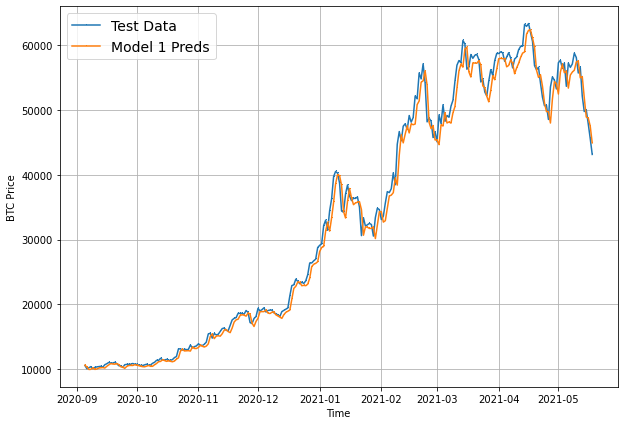

In [42]:
# Plotting model results
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, ],
    start=offset,
    label="Test Data"
)

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=model_1_preds,
    start=offset,
    label="Model 1 Preds"
)

### Model 2 - Dense model (window = 30, horizon = 1)

In [43]:
# Hyperparameters
HORIZON = 1
WINDOW_SIZE = 30

In [44]:
# Making windows data
full_windows, full_labels = make_windows(
    prices,
    window_size=WINDOW_SIZE,
    horizon=HORIZON
)
len(full_windows), len(full_labels)

(2757, 2757)

In [45]:
# Making train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    windows=full_windows,
    labels=full_labels,
    test_split=0.2
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [46]:
# Checking first 3 train windows
train_windows[:3]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
        133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
        164.31499, 177.63333, 188.29

In [47]:
# Creating a model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_2_dense")

# Compiling the model
model_2.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fitting the model
history_2 = model_2.fit(
    train_windows,
    train_labels,
    epochs=100,
    batch_size=128,
    verbose=0,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_2.name)]
)

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: mod

In [48]:
# Evaluating model 2
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 650.1509 - mae: 650.1509


[650.15087890625, 650.15087890625]

In [49]:
# Loading the best model 2
model_2_best = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2_best.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 633.3580 - mae: 633.3580


[633.3580322265625, 633.3580322265625]

In [50]:
# getting model 2 predictions
model_2_preds = make_preds(
    model_2,
    input_data=test_windows
)

18/18 [==============================] - 0s 2ms/step


In [51]:
# Evaluating results
model_2_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_2_preds
)
model_2_results

{'mae': 650.15094,
 'mse': 1405375.4,
 'rmse': 1185.4854,
 'mape': 2.9727616,
 'mase': 1.1364702}

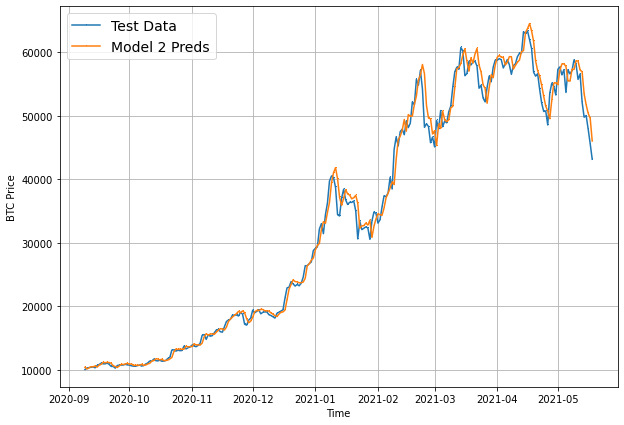

In [52]:
# Visualising model 2 results
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test Data"
)

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=model_2_preds,
    start=offset,
    label="Model 2 Preds"
)

### Model 3 - Dense model (window = 30, horizon = 7)

In [53]:
# Hyperparameters
HORIZON = 7
WINDOW_SIZE = 30

In [54]:
# Making windows data
full_windows, full_labels = make_windows(
    prices,
    window_size=WINDOW_SIZE,
    horizon=HORIZON
)
len(full_windows), len(full_labels)

(2751, 2751)

In [55]:
# Making train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    windows=full_windows,
    labels=full_labels,
    test_split=0.2
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [56]:
# Creating a model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3_dense")

# Compiling the model
model_3.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fitting the model
history_3 = model_3.fit(
    train_windows,
    train_labels,
    epochs=100,
    batch_size=128,
    verbose=0,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_3.name)]
)

INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: mod

In [57]:
# Evaluating model 3
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 1345.3651 - mae: 1345.3651


[1345.3651123046875, 1345.3651123046875]

In [58]:
# Making predictions with model 3
model_3_preds = make_preds(
    model_3,
    input_data=test_windows
)
model_3_preds[:3]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[9046.786, 9099.817, 9087.908, 9038.482, 8894.147, 9105.09 ,
        9155.04 ],
       [8730.311, 8886.191, 8733.884, 8554.115, 8726.743, 8653.562,
        8777.234],
       [8439.44 , 8725.931, 8592.081, 8495.75 , 8689.501, 8684.842,
        8702.595]], dtype=float32)>

In [59]:
# Evaluating model 3 preds
model_3_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_3_preds
)
model_3_results

{'mae': array([ 267.8238  ,  113.51869 ,  218.39816 ,  257.34    ,  262.2436  ,
         297.54428 ,  313.32422 ,  302.74072 ,  313.66803 ,  398.5002  ,
         577.51575 ,  606.1508  ,  559.4128  ,  563.18317 ,  330.50287 ,
         317.30762 ,  312.5855  ,  470.92877 ,  500.81152 ,  500.90805 ,
         207.94518 ,  207.49422 ,  121.606094,  113.41832 ,  247.66805 ,
         234.62785 ,  210.39781 ,  313.35004 ,  284.54205 ,   92.92411 ,
         118.47196 ,  112.822266,  102.48821 ,  183.01395 ,  189.9534  ,
         197.88826 ,  193.99059 ,  315.70627 ,  297.6818  ,  385.46576 ,
         718.6771  ,  319.5613  ,  191.49748 ,  259.94656 ,  166.03572 ,
         142.20222 ,  234.05168 ,  241.33244 ,  230.21422 ,  179.48918 ,
         217.0609  ,  130.05559 ,  140.70627 ,  243.92822 ,  457.2512  ,
         529.3687  ,  820.4809  ,  752.2427  ,  631.2548  ,  784.4614  ,
         600.46796 ,  304.04758 ,  378.43158 ,  624.7274  ,  585.1503  ,
         679.5036  ,  695.2272  ,  709.38934

In [60]:
# Function for evaluation matrix
# MAKING IT WORK FOR HIGHER HORIZON
def evaluate_preds(y_true, y_pred):

    # Ensuring that we use float32 dtype (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculating various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    # Account for different size metrics
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
    }

In [61]:
# Re-evaluating model 3 preds
model_3_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_3_preds
)
model_3_results

{'mae': 1345.3651,
 'mse': 5760197.0,
 'rmse': 1520.6954,
 'mape': 5.9789634,
 'mase': 2.394002}

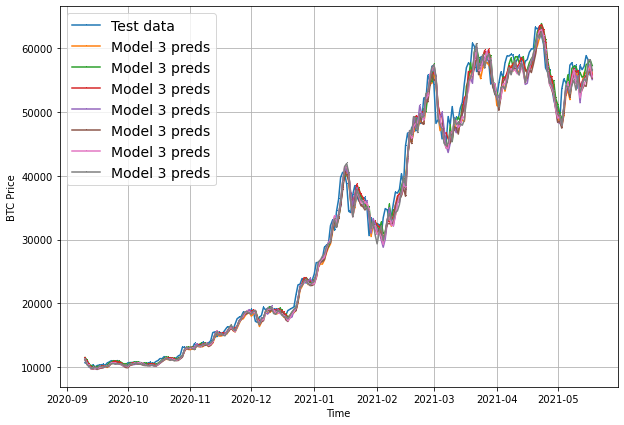

In [62]:
# Visualising the data
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test data"
)
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=model_3_preds,
    start=offset,
    label="Model 3 preds"
)

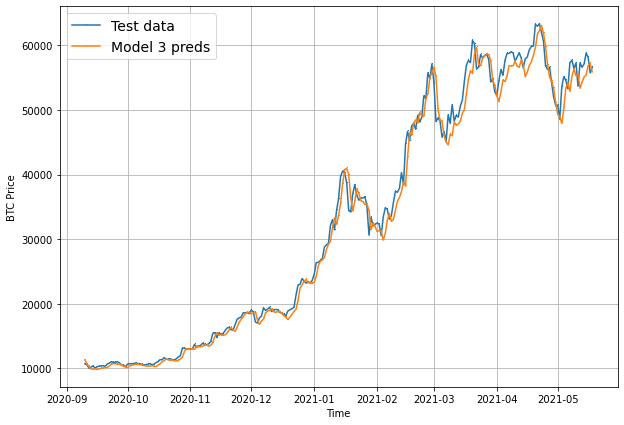

In [63]:
# Visualising the data
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test data"
)
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=tf.reduce_mean(model_3_preds, axis=1),
    start=offset,
    label="Model 3 preds"
)

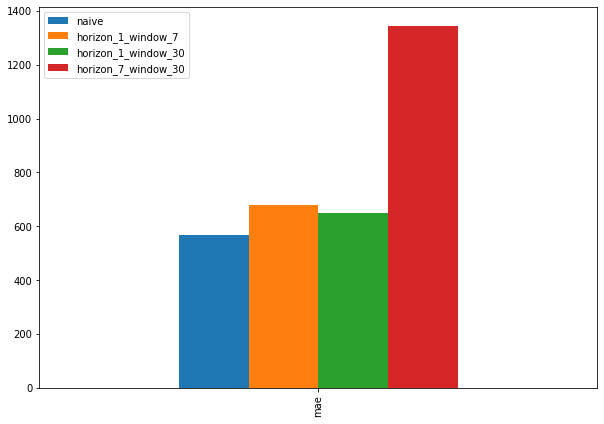

In [64]:
# Comparing models performance
pd.DataFrame({
    "naive": naive_results["mae"],
    "horizon_1_window_7": model_1_results["mae"],
    "horizon_1_window_30": model_2_results["mae"],
    "horizon_7_window_30": model_3_results["mae"]
}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

### Model 4 - Using Conv1D

In [65]:
# Defining horizon and window
HORIZON = 1
WINDOW_SIZE = 7

In [66]:
# Creating windowed data
full_windows,full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [67]:
# Creating train / test datasets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [68]:
# Checking data input shape
train_windows[0].shape # returns WINDOW_SIZE

(7,)

In [69]:
# Conv1D expects input of (batch_size, timestamps, input_dim)

In [70]:
# Reshaping the tensor
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [71]:
# Creating Lambda layer
expand_dim_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [72]:
# Testing Lambda layer
print(f"Original shape: {x.shape}") # Output WINDOW_SIZE
print(f"Expanded shape: {expand_dim_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dim_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [73]:
# Creating Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_Conv1D")

# Compiling the model
model_4.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam()
)

# Fitting the model
history_4 = model_4.fit(
    train_windows,
    train_labels,
    batch_size=128,
    epochs=100,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_4.name)]
)

Epoch 1/100
 1/18 [>.............................] - ETA: 6s - loss: 4034.6411

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 52ms/step - loss: 2145.3318 - val_loss: 2736.8323
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 317.5374

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 39ms/step - loss: 311.1281 - val_loss: 1375.1771
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 180.3391

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 41ms/step - loss: 211.9078 - val_loss: 1012.7954
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 224.9600

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 41ms/step - loss: 182.0354 - val_loss: 986.2043
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 177.3302 - val_loss: 986.3846
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 133.3731

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 53ms/step - loss: 174.8859 - val_loss: 985.2980
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 216.6871

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 43ms/step - loss: 174.1095 - val_loss: 951.8898
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 151.1229

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 41ms/step - loss: 169.3641 - val_loss: 949.3007
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 167.5034 - val_loss: 974.5477
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 184.3694

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 41ms/step - loss: 165.6008 - val_loss: 914.0368
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 184.7004

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 42ms/step - loss: 163.2294 - val_loss: 900.0466
Epoch 12/100
18/18 [==============================] - 0s 3ms/step - loss: 160.5439 - val_loss: 961.2737
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 126.0426

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 42ms/step - loss: 159.0933 - val_loss: 887.3884
Epoch 14/100
18/18 [==============================] - 0s 3ms/step - loss: 154.7516 - val_loss: 891.6061
Epoch 15/100
18/18 [==============================] - 0s 4ms/step - loss: 155.8949 - val_loss: 918.9929
Epoch 16/100
17/18 [===========================>..] - ETA: 0s - loss: 152.6519

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 46ms/step - loss: 150.9473 - val_loss: 836.6843
Epoch 17/100
18/18 [==============================] - 0s 4ms/step - loss: 147.4496 - val_loss: 857.7946
Epoch 18/100
18/18 [==============================] - 0s 4ms/step - loss: 145.9907 - val_loss: 848.3466
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 82.2858

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 50ms/step - loss: 143.3268 - val_loss: 806.3787
Epoch 20/100
18/18 [==============================] - 0s 3ms/step - loss: 143.1059 - val_loss: 811.1816
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 195.8304

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 40ms/step - loss: 140.9416 - val_loss: 765.5493
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 182.7537

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 42ms/step - loss: 138.2726 - val_loss: 762.4732
Epoch 23/100
18/18 [==============================] - 0s 4ms/step - loss: 134.6571 - val_loss: 764.4458
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 149.0313

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 53ms/step - loss: 136.0416 - val_loss: 757.5763
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 140.7355

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 44ms/step - loss: 134.7039 - val_loss: 734.1655
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 132.6941

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 47ms/step - loss: 130.3764 - val_loss: 716.3425
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 190.8390

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 41ms/step - loss: 129.8537 - val_loss: 706.7351
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 130.7316

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 44ms/step - loss: 127.0554 - val_loss: 702.8871
Epoch 29/100
18/18 [==============================] - 0s 4ms/step - loss: 126.0453 - val_loss: 707.4201
Epoch 30/100
18/18 [==============================] - 0s 4ms/step - loss: 128.8329 - val_loss: 813.4159
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 136.3089 - val_loss: 780.4042
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 130.0363 - val_loss: 708.7009
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 152.4011

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 41ms/step - loss: 126.0117 - val_loss: 673.3005
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 133.4146

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 48ms/step - loss: 120.9811 - val_loss: 658.8968
Epoch 35/100
18/18 [==============================] - 0s 3ms/step - loss: 120.4031 - val_loss: 665.1603
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 126.6150 - val_loss: 765.8940
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 163.5439

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 42ms/step - loss: 122.0523 - val_loss: 648.1558
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 110.0457

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 50ms/step - loss: 117.9465 - val_loss: 640.0168
Epoch 39/100
18/18 [==============================] - 0s 4ms/step - loss: 117.3742 - val_loss: 641.3588
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 110.6906

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 49ms/step - loss: 116.2992 - val_loss: 629.2969
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 118.2114 - val_loss: 636.6942
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 111.9071

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 54ms/step - loss: 120.5319 - val_loss: 627.8828
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 95.6918

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 40ms/step - loss: 115.1136 - val_loss: 617.8412
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 116.8287 - val_loss: 654.9953
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 84.5598

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 51ms/step - loss: 118.4808 - val_loss: 616.6612
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 114.6127 - val_loss: 625.0271
Epoch 47/100
18/18 [==============================] - 0s 3ms/step - loss: 116.8744 - val_loss: 716.9719
Epoch 48/100
18/18 [==============================] - 0s 3ms/step - loss: 115.9948 - val_loss: 634.0792
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 165.0658

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 40ms/step - loss: 114.7244 - val_loss: 616.0653
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 136.3271

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 42ms/step - loss: 115.3023 - val_loss: 610.9013
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 114.4851 - val_loss: 627.1865
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 121.9444

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 43ms/step - loss: 118.4350 - val_loss: 603.2871
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 62.3733

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 52ms/step - loss: 116.4161 - val_loss: 602.6257
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 111.9496 - val_loss: 611.9341
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 131.6306

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 43ms/step - loss: 113.6415 - val_loss: 595.0054
Epoch 56/100
18/18 [==============================] - 0s 3ms/step - loss: 112.1603 - val_loss: 749.7710
Epoch 57/100
18/18 [==============================] - 0s 3ms/step - loss: 130.2076 - val_loss: 671.6971
Epoch 58/100
18/18 [==============================] - 0s 3ms/step - loss: 121.3148 - val_loss: 663.4364
Epoch 59/100
18/18 [==============================] - 0s 4ms/step - loss: 114.1769 - val_loss: 623.2312
Epoch 60/100
18/18 [==============================] - 0s 3ms/step - loss: 115.2914 - val_loss: 615.7896
Epoch 61/100
 1/18 [>.............................] - ETA: 0s - loss: 138.8223

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 40ms/step - loss: 112.1689 - val_loss: 591.6067
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4302 - val_loss: 597.3659
Epoch 63/100
 1/18 [>.............................] - ETA: 0s - loss: 95.8602

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 41ms/step - loss: 112.2657 - val_loss: 587.2382
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 110.4251 - val_loss: 640.3224
Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 115.2323 - val_loss: 592.0240
Epoch 66/100
18/18 [==============================] - 0s 4ms/step - loss: 112.3571 - val_loss: 589.9928
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 109.1241 - val_loss: 638.7326
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 115.5237 - val_loss: 702.1850
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 127.2586 - val_loss: 659.4138
Epoch 70/100
18/18 [==============================] - 0s 3ms/step - loss: 123.7295 - val_loss: 607.1403
Epoch 71/100
18/18 [==============================] - 0s 4ms/step - loss: 112.0009 - val_loss: 607.0163
Epoch 72/100
18/18 [==============================] - 0s 4ms/step - loss: 11

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 68ms/step - loss: 110.3093 - val_loss: 579.0062
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 110.0966 - val_loss: 595.9337
Epoch 76/100
18/18 [==============================] - 0s 7ms/step - loss: 111.7026 - val_loss: 593.5449
Epoch 77/100
18/18 [==============================] - 0s 7ms/step - loss: 110.1425 - val_loss: 579.6738
Epoch 78/100
18/18 [==============================] - 0s 8ms/step - loss: 111.0769 - val_loss: 584.4191
Epoch 79/100
18/18 [==============================] - 0s 7ms/step - loss: 110.7495 - val_loss: 614.4561
Epoch 80/100
 1/18 [>.............................] - ETA: 0s - loss: 120.4247

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 43ms/step - loss: 111.1496 - val_loss: 576.4575
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 95.7861

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 39ms/step - loss: 108.1576 - val_loss: 575.6784
Epoch 82/100
16/18 [=========================>....] - ETA: 0s - loss: 113.7831

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 44ms/step - loss: 115.0918 - val_loss: 574.8387
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 112.0234 - val_loss: 647.1276
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 112.4035 - val_loss: 592.4685
Epoch 85/100
18/18 [==============================] - 0s 3ms/step - loss: 108.7901 - val_loss: 606.8494
Epoch 86/100
18/18 [==============================] - 0s 3ms/step - loss: 111.6650 - val_loss: 661.1389
Epoch 87/100
 1/18 [>.............................] - ETA: 0s - loss: 131.0135

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 38ms/step - loss: 110.9910 - val_loss: 571.8582
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 108.7214 - val_loss: 601.8420
Epoch 89/100
 1/18 [>.............................] - ETA: 0s - loss: 105.6757

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 39ms/step - loss: 110.3381 - val_loss: 571.1859
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 108.2587 - val_loss: 636.4944
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 115.0613 - val_loss: 623.4879
Epoch 92/100
18/18 [==============================] - 0s 6ms/step - loss: 110.5158 - val_loss: 572.3904
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 114.6687 - val_loss: 632.9797
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2449 - val_loss: 581.7937
Epoch 95/100
18/18 [==============================] - 0s 6ms/step - loss: 110.3620 - val_loss: 574.0161
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 115.8674 - val_loss: 595.9524
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6485 - val_loss: 592.8004
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 10

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 48ms/step - loss: 109.0066 - val_loss: 569.1664
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6223 - val_loss: 631.2046


In [74]:
# Checking the model structure
model_4.summary()

Model: "model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Evaluating the model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 631.2045


631.2045288085938

In [76]:
# Loading back the best performing model
model_4 = tf.keras.models.load_model("./model_experiments/model_4_Conv1D/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 569.1664


569.1664428710938

In [77]:
# Making predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8910.83 , 8802.381, 9014.084, 8814.986, 8769.014, 8747.953,
       8707.493, 8545.787, 8484.913, 8532.881], dtype=float32)>

In [78]:
# Evaluating predictions
model_4_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_4_preds
)
model_4_results

{'mae': 569.1664,
 'mse': 1181325.5,
 'rmse': 1086.888,
 'mape': 2.552507,
 'mase': 0.9998677}

### Model 5 - LSTM (RNN)

In [79]:
# Building LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=outputs, name="module_5_LSTM")

# Compiling the model
model_5.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam()
)

# Fitting the model
history_5 = model_5.fit(
    train_windows,
    train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_5.name)]
)

Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 2931.5405 INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 137ms/step - loss: 2856.4241 - val_loss: 13039.9414
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 1420.5686INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 107ms/step - loss: 1420.5686 - val_loss: 4316.9175
Epoch 3/100
15/18 [========================>.....] - ETA: 0s - loss: 348.0896INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 110ms/step - loss: 343.7108 - val_loss: 1502.3073
Epoch 4/100
14/18 [======================>.......] - ETA: 0s - loss: 222.0179INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 134ms/step - loss: 215.4119 - val_loss: 1095.7948
Epoch 5/100
17/18 [===========================>..] - ETA: 0s - loss: 185.7545INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 101ms/step - loss: 183.8213 - val_loss: 1063.1636
Epoch 6/100
17/18 [===========================>..] - ETA: 0s - loss: 177.7733INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 104ms/step - loss: 179.5259 - val_loss: 1009.5812
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 180.2101 - val_loss: 1025.3411
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 178.5126 - val_loss: 1047.8469
Epoch 9/100
18/18 [==============================] - 0s 8ms/step - loss: 176.8947 - val_loss: 1023.5343
Epoch 10/100
16/18 [=========================>....] - ETA: 0s - loss: 173.5121INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 110ms/step - loss: 176.1325 - val_loss: 1002.7930
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - loss: 176.4488 - val_loss: 1011.0480
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 174.1539 - val_loss: 1008.7361
Epoch 13/100
16/18 [=========================>....] - ETA: 0s - loss: 170.9170INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 121ms/step - loss: 172.9229 - val_loss: 986.3596
Epoch 14/100
18/18 [==============================] - 0s 6ms/step - loss: 171.5979 - val_loss: 1002.9602
Epoch 15/100
18/18 [==============================] - 0s 7ms/step - loss: 170.8719 - val_loss: 996.6597
Epoch 16/100
11/18 [=================>............] - ETA: 0s - loss: 170.0181INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 104ms/step - loss: 169.3057 - val_loss: 946.0333
Epoch 17/100
18/18 [==============================] - 0s 10ms/step - loss: 167.8150 - val_loss: 1007.6441
Epoch 18/100
18/18 [==============================] - 0s 9ms/step - loss: 167.8195 - val_loss: 973.1160
Epoch 19/100
18/18 [==============================] - 0s 7ms/step - loss: 165.9375 - val_loss: 967.7747
Epoch 20/100
16/18 [=========================>....] - ETA: 0s - loss: 162.8721INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 110ms/step - loss: 163.9589 - val_loss: 918.1705
Epoch 21/100
16/18 [=========================>....] - ETA: 0s - loss: 162.2975INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 103ms/step - loss: 163.5266 - val_loss: 916.9719
Epoch 22/100
18/18 [==============================] - 0s 5ms/step - loss: 162.0352 - val_loss: 919.5778
Epoch 23/100
18/18 [==============================] - 0s 6ms/step - loss: 161.7151 - val_loss: 939.3215
Epoch 24/100
18/18 [==============================] - 0s 10ms/step - loss: 160.0686 - val_loss: 949.4017
Epoch 25/100
17/18 [===========================>..] - ETA: 0s - loss: 159.1851INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 121ms/step - loss: 158.3596 - val_loss: 891.5952
Epoch 26/100
15/18 [========================>.....] - ETA: 0s - loss: 160.8574INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 106ms/step - loss: 156.2477 - val_loss: 883.9521
Epoch 27/100
14/18 [======================>.......] - ETA: 0s - loss: 157.4663INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 103ms/step - loss: 155.1402 - val_loss: 878.9154
Epoch 28/100
 8/18 [============>.................] - ETA: 0s - loss: 161.2677INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 113ms/step - loss: 153.7665 - val_loss: 859.8356
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 152.5381 - val_loss: 878.7612
Epoch 30/100
18/18 [==============================] - 0s 7ms/step - loss: 151.4849 - val_loss: 866.8574
Epoch 31/100
15/18 [========================>.....] - ETA: 0s - loss: 147.5669INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 104ms/step - loss: 149.4963 - val_loss: 832.4078
Epoch 32/100
13/18 [====================>.........] - ETA: 0s - loss: 149.9426INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 112ms/step - loss: 148.3186 - val_loss: 825.2958
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 150.5957 - val_loss: 899.1597
Epoch 34/100
14/18 [======================>.......] - ETA: 0s - loss: 153.4200INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 99ms/step - loss: 149.2674 - val_loss: 813.4606
Epoch 35/100
18/18 [==============================] - 0s 6ms/step - loss: 144.9186 - val_loss: 838.0334
Epoch 36/100
 8/18 [============>.................] - ETA: 0s - loss: 139.2749INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 120ms/step - loss: 146.0595 - val_loss: 805.5007
Epoch 37/100
13/18 [====================>.........] - ETA: 0s - loss: 145.8855INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 100ms/step - loss: 143.7114 - val_loss: 794.7798
Epoch 38/100
13/18 [====================>.........] - ETA: 0s - loss: 145.8472INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 101ms/step - loss: 140.6880 - val_loss: 776.6137
Epoch 39/100
12/18 [===================>..........] - ETA: 0s - loss: 139.4528INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 104ms/step - loss: 138.9108 - val_loss: 772.5529
Epoch 40/100
18/18 [==============================] - 0s 6ms/step - loss: 138.2630 - val_loss: 776.8677
Epoch 41/100
12/18 [===================>..........] - ETA: 0s - loss: 139.9895INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 117ms/step - loss: 136.3972 - val_loss: 756.8154
Epoch 42/100
13/18 [====================>.........] - ETA: 0s - loss: 134.8427INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 106ms/step - loss: 135.4679 - val_loss: 756.0808
Epoch 43/100
12/18 [===================>..........] - ETA: 0s - loss: 130.5640INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 117ms/step - loss: 134.3932 - val_loss: 752.7433
Epoch 44/100
12/18 [===================>..........] - ETA: 0s - loss: 131.7689INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 107ms/step - loss: 132.1618 - val_loss: 738.0688
Epoch 45/100
13/18 [====================>.........] - ETA: 0s - loss: 128.4839INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 118ms/step - loss: 132.0017 - val_loss: 736.7415
Epoch 46/100
12/18 [===================>..........] - ETA: 0s - loss: 137.4518INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 101ms/step - loss: 131.1845 - val_loss: 732.0018
Epoch 47/100
13/18 [====================>.........] - ETA: 0s - loss: 120.3680INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 133ms/step - loss: 131.3067 - val_loss: 723.2291
Epoch 48/100
18/18 [==============================] - 0s 7ms/step - loss: 129.3242 - val_loss: 731.7791
Epoch 49/100
18/18 [==============================] - 0s 11ms/step - loss: 128.5606 - val_loss: 725.8168
Epoch 50/100
18/18 [==============================] - 0s 10ms/step - loss: 130.3801 - val_loss: 731.2994
Epoch 51/100
18/18 [==============================] - 0s 9ms/step - loss: 130.8758 - val_loss: 786.1232
Epoch 52/100
10/18 [===============>..............] - ETA: 0s - loss: 137.5251INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 106ms/step - loss: 133.5767 - val_loss: 692.8348
Epoch 53/100
 8/18 [============>.................] - ETA: 0s - loss: 118.1668INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 123ms/step - loss: 126.9019 - val_loss: 689.1453
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 125.7302 - val_loss: 693.1421
Epoch 55/100
11/18 [=================>............] - ETA: 0s - loss: 131.4832INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 109ms/step - loss: 123.1570 - val_loss: 678.5352
Epoch 56/100
18/18 [==============================] - 0s 7ms/step - loss: 126.7094 - val_loss: 695.6416
Epoch 57/100
18/18 [==============================] - 0s 10ms/step - loss: 124.2018 - val_loss: 678.7340
Epoch 58/100
 9/18 [==============>...............] - ETA: 0s - loss: 123.9495INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 109ms/step - loss: 121.2448 - val_loss: 666.2493
Epoch 59/100
18/18 [==============================] - 0s 6ms/step - loss: 120.4123 - val_loss: 666.5088
Epoch 60/100
18/18 [==============================] - 0s 8ms/step - loss: 121.8804 - val_loss: 667.9102
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 122.8485 - val_loss: 723.2170
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 128.1842 - val_loss: 752.8117
Epoch 63/100
12/18 [===================>..........] - ETA: 0s - loss: 129.0562INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 127ms/step - loss: 124.2962 - val_loss: 665.5044
Epoch 64/100
13/18 [====================>.........] - ETA: 0s - loss: 122.5604INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 98ms/step - loss: 118.9124 - val_loss: 649.8082
Epoch 65/100
13/18 [====================>.........] - ETA: 0s - loss: 117.2104INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 111ms/step - loss: 118.2494 - val_loss: 643.5172
Epoch 66/100
18/18 [==============================] - 0s 10ms/step - loss: 117.8280 - val_loss: 655.8132
Epoch 67/100
16/18 [=========================>....] - ETA: 0s - loss: 115.3745INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 108ms/step - loss: 118.2798 - val_loss: 638.9451
Epoch 68/100
10/18 [===============>..............] - ETA: 0s - loss: 116.5557INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 114ms/step - loss: 118.5157 - val_loss: 636.2907
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 120.0727 - val_loss: 637.7236
Epoch 70/100
13/18 [====================>.........] - ETA: 0s - loss: 114.4646INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 106ms/step - loss: 116.2862 - val_loss: 630.0621
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 116.2103 - val_loss: 652.1552
Epoch 72/100
18/18 [==============================] - 0s 7ms/step - loss: 121.0288 - val_loss: 650.8551
Epoch 73/100
12/18 [===================>..........] - ETA: 0s - loss: 117.9116INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 113ms/step - loss: 117.5222 - val_loss: 626.4438
Epoch 74/100
18/18 [==============================] - 0s 7ms/step - loss: 115.7653 - val_loss: 634.6161
Epoch 75/100
14/18 [======================>.......] - ETA: 0s - loss: 113.6199INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 106ms/step - loss: 116.0569 - val_loss: 623.4684
Epoch 76/100
10/18 [===============>..............] - ETA: 0s - loss: 115.8113INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 118ms/step - loss: 115.1124 - val_loss: 616.6467
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 121.6452 - val_loss: 660.3092
Epoch 78/100
18/18 [==============================] - ETA: 0s - loss: 118.8530INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 106ms/step - loss: 118.8530 - val_loss: 614.8398
Epoch 79/100
13/18 [====================>.........] - ETA: 0s - loss: 110.5898INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 102ms/step - loss: 113.7385 - val_loss: 613.7838
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 115.2011 - val_loss: 653.7521
Epoch 81/100
18/18 [==============================] - 0s 8ms/step - loss: 114.4104 - val_loss: 633.6443
Epoch 82/100
18/18 [==============================] - 0s 7ms/step - loss: 117.0521 - val_loss: 624.3636
Epoch 83/100
18/18 [==============================] - 0s 13ms/step - loss: 113.6617 - val_loss: 663.2884
Epoch 84/100
18/18 [==============================] - 0s 14ms/step - loss: 117.5124 - val_loss: 642.5703
Epoch 85/100
14/18 [======================>.......] - ETA: 0s - loss: 111.8574INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 118ms/step - loss: 115.9611 - val_loss: 608.7205
Epoch 86/100
 9/18 [==============>...............] - ETA: 0s - loss: 111.5029INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 120ms/step - loss: 115.1266 - val_loss: 606.9202
Epoch 87/100
18/18 [==============================] - 0s 8ms/step - loss: 113.1660 - val_loss: 609.3209
Epoch 88/100
18/18 [==============================] - 0s 8ms/step - loss: 114.0886 - val_loss: 618.5907
Epoch 89/100
18/18 [==============================] - 0s 8ms/step - loss: 113.1908 - val_loss: 664.8265
Epoch 90/100
18/18 [==============================] - 0s 7ms/step - loss: 118.7805 - val_loss: 633.1198
Epoch 91/100
18/18 [==============================] - 0s 7ms/step - loss: 114.9102 - val_loss: 628.6816
Epoch 92/100
10/18 [===============>..............] - ETA: 0s - loss: 111.3499INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 104ms/step - loss: 113.0774 - val_loss: 605.5792
Epoch 93/100
15/18 [========================>.....] - ETA: 0s - loss: 115.8250INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 104ms/step - loss: 112.6874 - val_loss: 596.7761
Epoch 94/100
10/18 [===============>..............] - ETA: 0s - loss: 110.0650INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 118ms/step - loss: 111.1934 - val_loss: 596.3157
Epoch 95/100
18/18 [==============================] - 0s 8ms/step - loss: 111.3134 - val_loss: 599.4597
Epoch 96/100
18/18 [==============================] - 0s 8ms/step - loss: 114.2572 - val_loss: 603.4771
Epoch 97/100
18/18 [==============================] - 0s 8ms/step - loss: 112.5291 - val_loss: 634.7333
Epoch 98/100
10/18 [===============>..............] - ETA: 0s - loss: 112.1632INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 104ms/step - loss: 113.6169 - val_loss: 594.4846
Epoch 99/100
18/18 [==============================] - 0s 10ms/step - loss: 111.3812 - val_loss: 594.5536
Epoch 100/100
18/18 [==============================] - 0s 8ms/step - loss: 114.4297 - val_loss: 610.6525


In [80]:
# Loading the best version
model_5 = tf.keras.models.load_model("model_experiments/module_5_LSTM/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 594.4846


594.4845581054688

In [81]:
# Making predictions
model_5_preds = make_preds(model_5, test_windows)
model_5_preds

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8976.493 ,  8836.593 ,  8997.583 ,  8846.267 ,  8743.399 ,
        8748.051 ,  8728.558 ,  8589.188 ,  8475.805 ,  8542.585 ,
        8334.7295,  8156.957 ,  8094.4043,  7780.3394,  7378.7603,
        7254.9863,  7109.6934,  7125.2324,  7116.5923,  7387.27  ,
        7461.4883,  7644.46  ,  7667.273 ,  7492.4966,  7415.796 ,
        7347.7603,  7286.738 ,  7332.258 ,  7483.4453,  7554.326 ,
        7580.5605,  7447.5117,  7326.8135,  7245.7656,  7210.713 ,
        7231.494 ,  7137.293 ,  7120.79  ,  6981.3193,  6704.837 ,
        7154.3145,  7245.3867,  7171.4307,  7254.7095,  7305.3975,
        7286.5312,  7219.2744,  7256.5557,  7232.9473,  7234.8774,
        7310.371 ,  7398.055 ,  7328.8   ,  7239.696 ,  7214.6147,
        7062.177 ,  7199.065 ,  7329.85  ,  7370.0557,  7625.324 ,
        7975.6943,  8148.2793,  7965.8467,  8070.6797,  8171.5283,
        8191.5186,  8159.8936,  8561.563 ,  8882.171 ,  8821.223 ,
        8929.7

In [82]:
# Evaluating predictions
model_5_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_5_preds
)
model_5_results

{'mae': 594.48456,
 'mse': 1271945.2,
 'rmse': 1127.8055,
 'mape': 2.6879988,
 'mase': 1.0443447}

In [83]:
# Adding Blockchain halving events
block_reward_1 = 50 # 3 January 2009
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Adding block reward dates
block_reward_2_datetime = np.datetime64("2012-11-08")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")


In [84]:
# Creating date ranges
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

block_reward_2_days, block_reward_3_days

(1012, 2421)

In [85]:
# Adding in block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Adding in block_reward values
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [86]:
# Check top 5 values
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [87]:
# Checking 5 mid values
bitcoin_prices_block[1500:1505]

,Price,block_reward
Date,,
2017-11-09,7342.82375,12.5
2017-11-10,7250.77000,12.5
2017-11-11,6773.69500,12.5
2017-11-12,6075.30125,12.5
2017-11-13,5969.13000,12.5


In [88]:
# Checking last 5 values
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<AxesSubplot:xlabel='Date'>

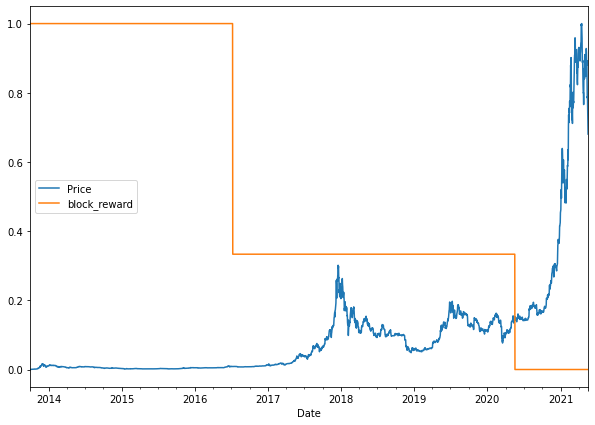

In [89]:
# Plotting block reward vs price over time
from sklearn.preprocessing import minmax_scale

scaled_price_block_df = pd.DataFrame(
    minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
    columns=bitcoin_prices_block.columns,
    index=bitcoin_prices_block.index
)
scaled_price_block_df.plot(figsize=(10, 7))

### Creating windowed multi-variate dataset with pandas

In [90]:
# Setting up hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [91]:
# Making a copy of Bitcoin dataset
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Adding windowed column
for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f"Price+{i + 1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [92]:
# Creating X (windows) and y (horizon)
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

X.head(), y.head()

(            block_reward     Price+1     Price+2     Price+3     Price+4  \
 Date                                                                       
 2013-10-08          25.0  121.794998  120.655327  121.338661  118.674660   
 2013-10-09          25.0  123.032997  121.794998  120.655327  121.338661   
 2013-10-10          25.0  124.049004  123.032997  121.794998  120.655327   
 2013-10-11          25.0  125.961159  124.049004  123.032997  121.794998   
 2013-10-12          25.0  125.279663  125.961159  124.049004  123.032997   
 
                Price+5     Price+6     Price+7  
 Date                                            
 2013-10-08  108.584831  125.455002  123.654991  
 2013-10-09  118.674660  108.584831  125.455002  
 2013-10-10  121.338661  118.674660  108.584831  
 2013-10-11  120.655327  121.338661  118.674660  
 2013-10-12  121.794998  120.655327  121.338661  ,
 Date
 2013-10-08    123.032997
 2013-10-09    124.049004
 2013-10-10    125.961159
 2013-10-11    125.27966

In [93]:
# Making train and test sets, using indexing
split_size = int(len(X) * 0.8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)